<a href="https://colab.research.google.com/github/KDiBSilva/Adult_Income/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Numpy
import numpy as np
# Pandas
import pandas as pd

# MatplotLib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)


## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

import warnings
warnings.filterwarnings('ignore')

#About Adult Income Dataset:

Information and dataset found from Kaggle: [Here](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

Dataset information also resourced from UCI: [Link](https://archive.ics.uci.edu/ml/datasets/adult)

___
Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. However, we will still explore other models to compare performance. 

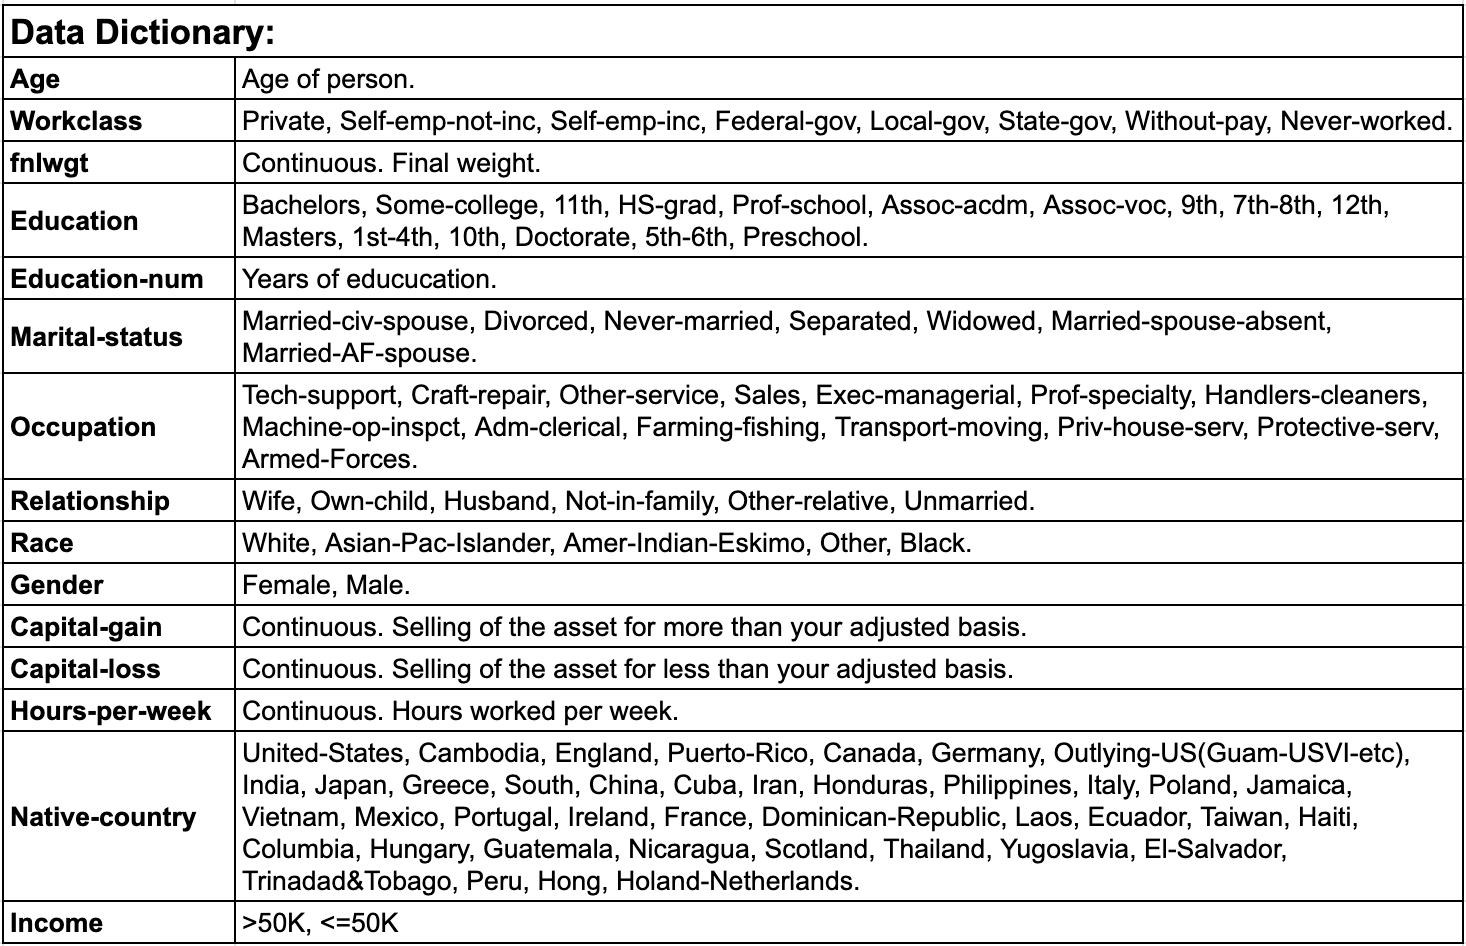


- Target column for this dataset is 'income'.
- Income column represents whether a person will have earn greater $50K or less based on the other values.
- This will be a classification problem as there are only two outcomes to predict, this column will be change to a 0 = >50K and 1 = <=50K.

#Load Dataset

In [3]:
# CSV
filename = '/content/drive/My Drive/Coding Dojo/Data/adult.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#Inspect & Clean

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- There are no missing values to address.
- There are no incorrect data types to address.

For Machine Learning
- Numerical(int64) column will need to be scaled(float).
- Categorical(object) column will need to be OneHotEncoded.

In [6]:
# Duplicate values
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


- There are 52 duplicate to be removed. 

In [7]:
# Drop duplicates and save dataframe
df = df.drop_duplicates()

# Verify duplicates dropped
print(f'There are {df.duplicated().sum()} duplicate rows remaining.')

There are 0 duplicate rows remaining.


- Duplicates have been removed.

In [8]:
# Shape
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} column. \nWhich are {df.shape[0]} observations and {df.shape[1]-1} features with 1 target that will be used for modeling.')

There are 48790 rows and 15 column. 
Which are 48790 observations and 14 features with 1 target that will be used for modeling.


In [9]:
# Check for and address any impossible values in numeric columns.
df.describe(include='number')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# Finding how many values in the 'hours-per-week' column are over 60 hours.
sixtyplus = df['hours-per-week'] >= 60

df[sixtyplus].value_counts().sum()

3853

- 'hours-per-week' has a max value of 99, this was alarming when thinking of the common weekly work schedule. However, further exploration of this column shows that this dataset has 3,853 values great that 60 hours a week, which confirms this is not an error of any kind and needs no corrections.

In [11]:
# Check for and address any impossible values in object columns.
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


In [12]:
# Inspect categorical columns for errors
# Establish columns
cat_cols = make_column_selector(dtype_include='object')(df)
# For loop to display for all columns
for col in cat_cols:
  display(df[col].value_counts(normalize=True))

Private             0.693995
Self-emp-not-inc    0.079135
Local-gov           0.064275
?                   0.057286
State-gov           0.040603
Self-emp-inc        0.034720
Federal-gov         0.029350
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

HS-grad         0.323222
Some-college    0.222648
Bachelors       0.164234
Masters         0.054437
Assoc-voc       0.042222
11th            0.037139
Assoc-acdm      0.032814
10th            0.028469
7th-8th         0.019553
Prof-school     0.017094
9th             0.015495
12th            0.013425
Doctorate       0.012175
5th-6th         0.010391
1st-4th         0.005022
Preschool       0.001660
Name: education, dtype: float64

Married-civ-spouse       0.458414
Never-married            0.329617
Divorced                 0.135889
Separated                0.031359
Widowed                  0.031113
Married-spouse-absent    0.012851
Married-AF-spouse        0.000758
Name: marital-status, dtype: float64

Prof-specialty       0.126358
Craft-repair         0.125067
Exec-managerial      0.124657
Adm-clerical         0.114901
Sales                0.112749
Other-service        0.100820
Machine-op-inspct    0.061836
?                    0.057491
Transport-moving     0.048268
Handlers-cleaners    0.042447
Farming-fishing      0.030437
Tech-support         0.029617
Protective-serv      0.020127
Priv-house-serv      0.004919
Armed-Forces         0.000307
Name: occupation, dtype: float64

Husband           0.403833
Not-in-family     0.257368
Own-child         0.155134
Unmarried         0.105022
Wife              0.047776
Other-relative    0.030867
Name: relationship, dtype: float64

White                 0.854970
Black                 0.095983
Asian-Pac-Islander    0.031092
Amer-Indian-Eskimo    0.009633
Other                 0.008321
Name: race, dtype: float64

Male      0.668457
Female    0.331543
Name: gender, dtype: float64

United-States                 0.897561
Mexico                        0.019328
?                             0.017545
Philippines                   0.006026
Germany                       0.004222
Puerto-Rico                   0.003771
Canada                        0.003730
El-Salvador                   0.003177
India                         0.003095
Cuba                          0.002828
England                       0.002603
China                         0.002501
South                         0.002357
Jamaica                       0.002173
Italy                         0.002152
Dominican-Republic            0.002111
Japan                         0.001886
Poland                        0.001783
Guatemala                     0.001763
Vietnam                       0.001763
Columbia                      0.001742
Haiti                         0.001537
Portugal                      0.001373
Taiwan                        0.001332
Iran                          0.001209
Greece                   

<=50K    0.760586
>50K     0.239414
Name: income, dtype: float64

- No inconsistent values found in column of object type.
- There was no missing values because the unknown values are filled in with
'?'. Columns: workclass, occupation, native-country have a small  the percentage of these values is low, so I will drop them from this data set.

In [13]:
# Drop '?' values form "workclass" column
df.drop(df.index[df['workclass'] == '?'], inplace = True)
# Confirm drop
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
# Drop '?' values form "occupation" column
df.drop(df.index[df['occupation'] == '?'], inplace = True)
# Confirm drop
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [15]:
# Drop '?' values form "native-country" column
df.drop(df.index[df['native-country'] == '?'], inplace = True)
# Confirm drop
df['native-country'].value_counts()

United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [16]:
# Shape
df.shape
print(f'There are now {df.shape[0]} rows and {df.shape[1]} column after dropping the unknown("?") values. \nWhich are {df.shape[0]} observations and {df.shape[1]-1} features with 1 target that will be used for modeling.')

There are now 45175 rows and 15 column after dropping the unknown("?") values. 
Which are 45175 observations and 14 features with 1 target that will be used for modeling.


In [17]:
# Check amount 'fnlwgt' unique values
df['fnlwgt'].nunique()

26741

In [18]:
# Drop the unnecessary columns
df = df.drop(columns=['relationship', 'education', 'fnlwgt'])
df.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K


Columns Removed:
- 'relationship' column is being dropped as it is not a key feature for predicting income. Where as 'marital-status' will give similar information and does provide a useful observation for income earned. 
- 'education' is being dropped as 'education-num' will serve the purpose of education status. 
- 'fnlwgt' will also be dropped as this has 28,523 unique values and will not be benefical to our model.

#Exploratory Visualization

###Catagorical
- 'workclass'
- 'marital-status'
- 'occupation'
- 'race'
- 'gender'
- 'native-country'
- 'income'

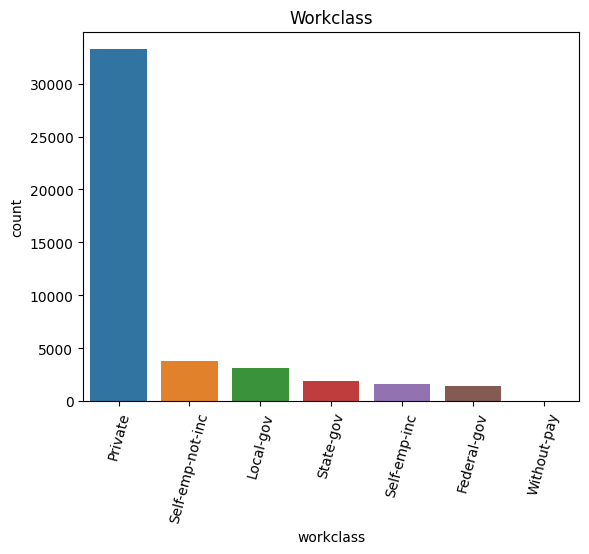

In [34]:
# countplot for 'workclass' in decending order
ax = sns.countplot(data = df, x= 'workclass', order=df['workclass'].value_counts().index)
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
# title
ax.set_title('Workclass');

- Counts for 'without-pay' appear to be zero.

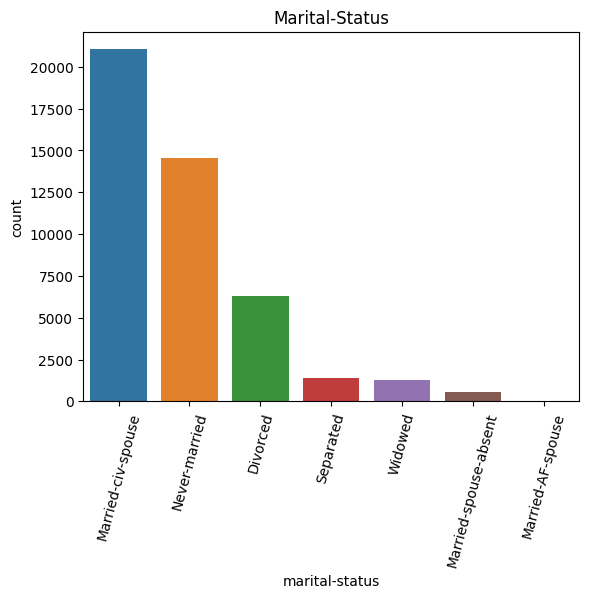

In [33]:
# countplot for 'marital-status' in decending order
ax = sns.countplot(data = df, x= 'marital-status', order=df['marital-status'].value_counts().index)
# title
ax.set_title('Marital-Status')
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

- Value count for 'Married-AF-spouse' appear to be zero. 

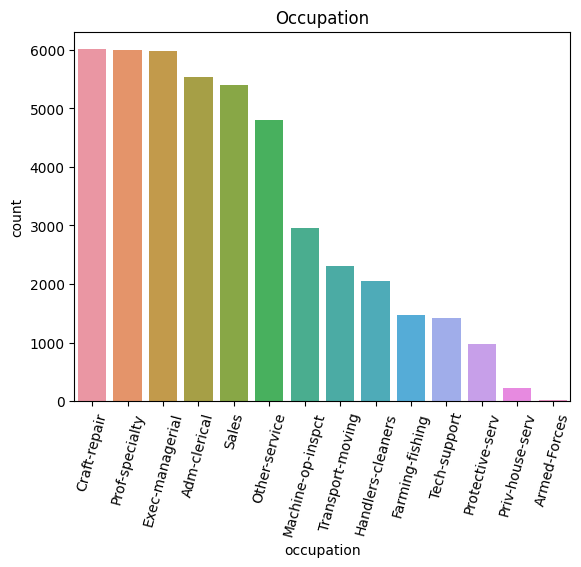

In [35]:
# countplot for 'occupation' in decending order
ax = sns.countplot(data = df, x = 'occupation', order=df['occupation'].value_counts().index)
# title
ax.set_title('Occupation')
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

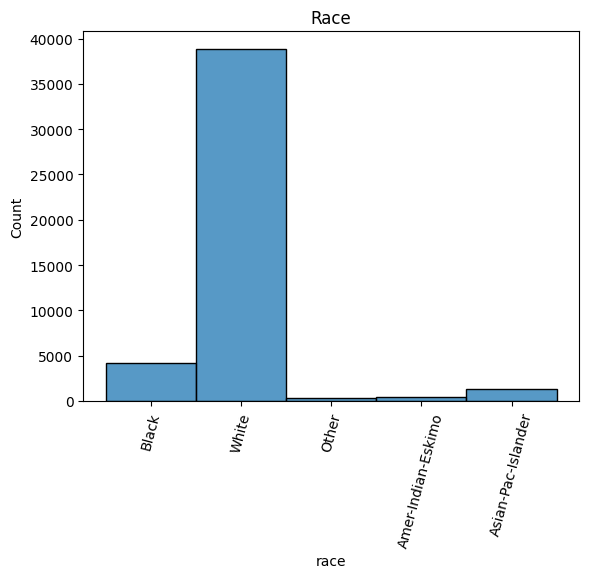

In [39]:
# histogram 'race'
ax = sns.histplot(data= df, x= 'race')
# title
ax.set_title('Race')
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

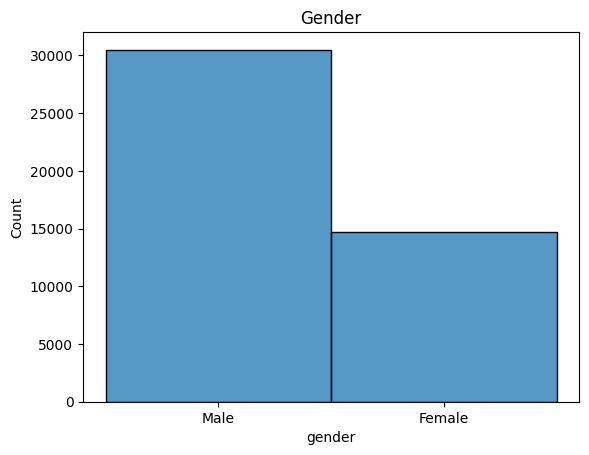

In [53]:
# histogram for 'gender'
ax = sns.histplot(data= df, x= 'gender')
# title
ax.set_title('Gender');

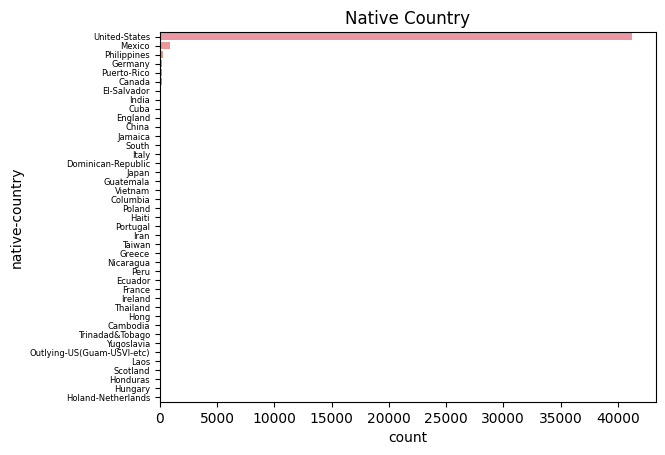

In [50]:
# count plot for 'native-country' in decending order
ax = sns.countplot(data = df, y= 'native-country', order=df['native-country'].value_counts().index)
# adjusted y label font size
plt.tick_params(axis= 'y', labelsize=6)
# title
ax.set_title('Native Country');

- 'native-country' was a possible option to drop from the dataset, I kept it for any possible correlations. However, this count plot shows that of the 45,175 observations in this dataset, 40,000 are of the United-States, this no longer seems to be a valuable variable in predicting income and will be dropped from the dataset. 

In [55]:
# Drop the unnecessary 'native-country' column
df = df.drop(columns='native-country')
df.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,<=50K


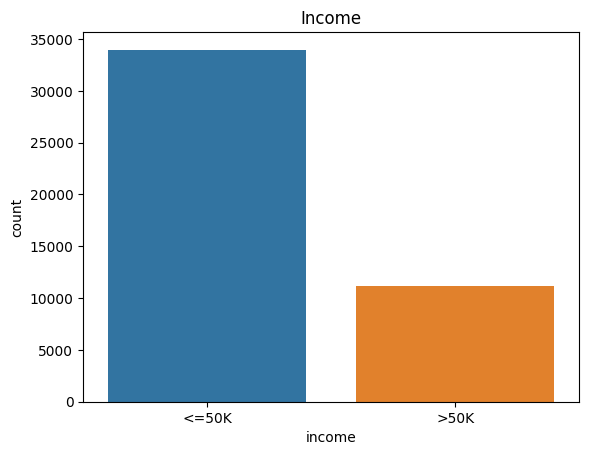

In [41]:
# countplot for 'income' / Target
ax = sns.countplot(data = df, x = 'income', order=df['income'].value_counts().index)
# title
ax.set_title('Income');

###Numerical
- 'age'
- 'education'
- 'capital-gain'
- 'capital-loss'
- 'hours-per-week'

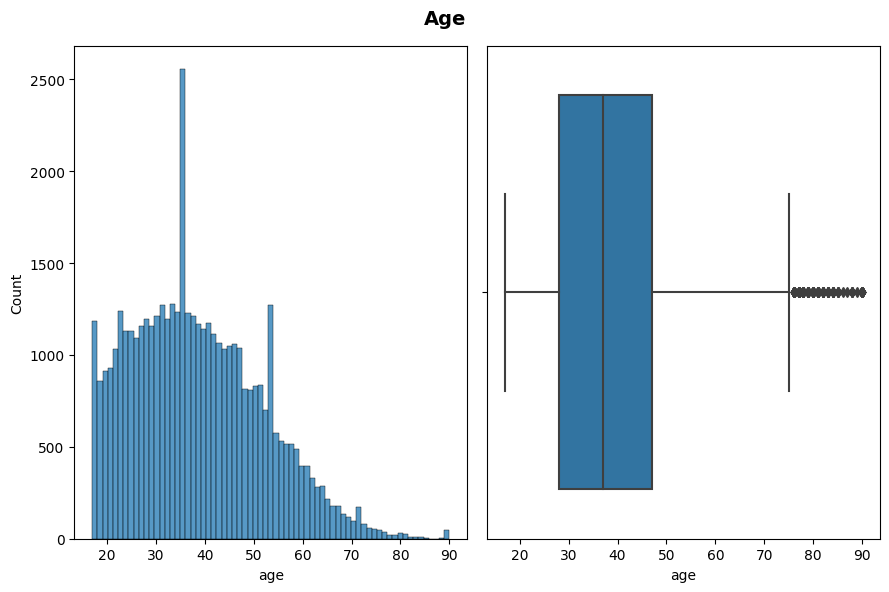

In [64]:
# histogram and boxplot for 'age'
# figure for two plots 
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))
# histogram
sns.histplot(data = df, x = 'age', ax = axes[0])
# boxplot
sns.boxplot(data = df, x = 'age', ax = axes[1])
# figure title
fig.suptitle('Age', fontsize = 14, fontweight = 'bold', y = .98)
# figure fit
fig.tight_layout();

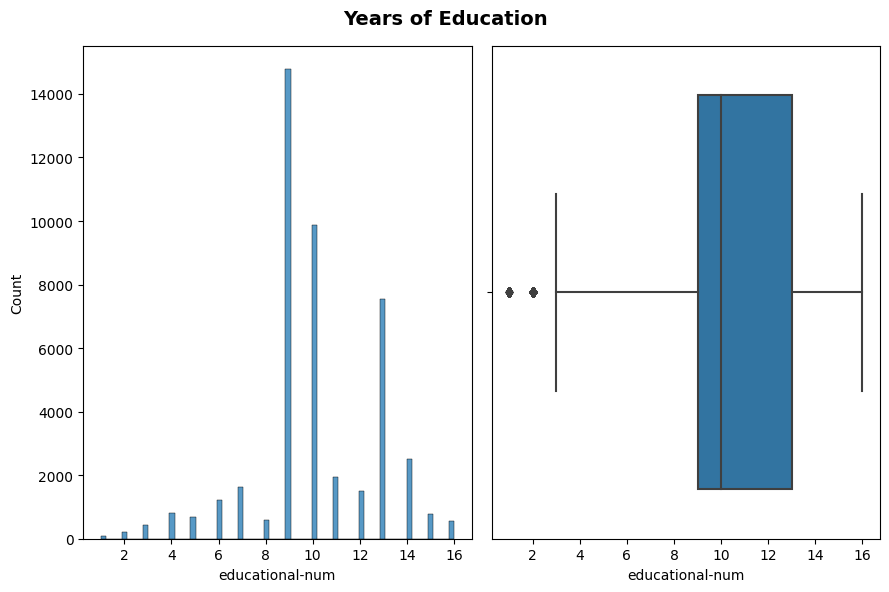

In [54]:
# histogram and boxplot for 'educational-num'
# figure for two plots 
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))
# histogram
sns.histplot(data = df, x = 'educational-num', ax = axes[0])
# boxplot
sns.boxplot(data = df, x = 'educational-num', ax = axes[1])
# figure title
fig.suptitle('Years of Education', fontsize = 14, fontweight = 'bold', y = .98)
# figure fit
fig.tight_layout();

- Outliers here look to be those less than 3 years of education.

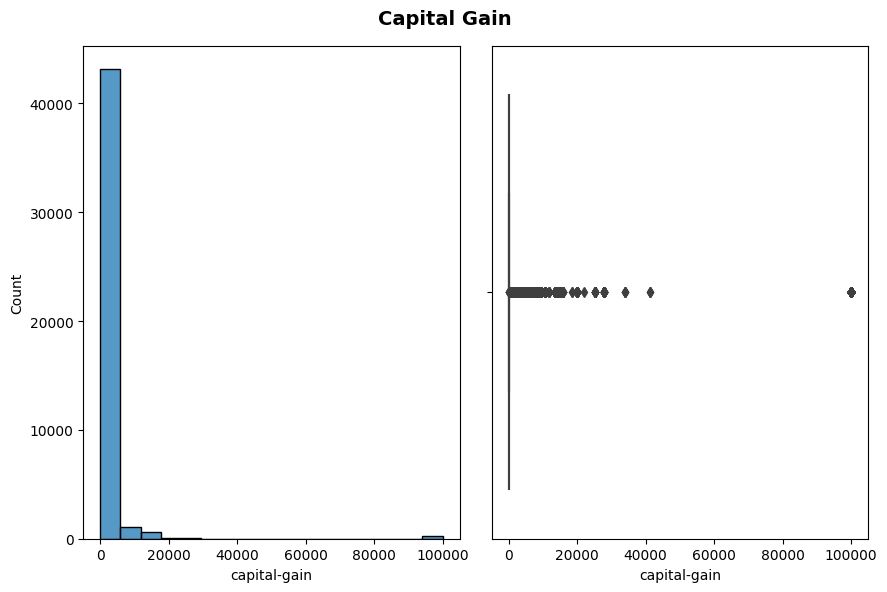

In [58]:
# histogram and boxplot for 'capital-gain'
# figure for two plots 
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))
# histogram
sns.histplot(data = df, x = 'capital-gain', ax = axes[0])
# boxplot
sns.boxplot(data = df, x = 'capital-gain', ax = axes[1])
# figure title
fig.suptitle('Capital Gain', fontsize = 14, fontweight = 'bold', y = .98)
# figure fit
fig.tight_layout();

- Outliers here are about 30,000+ with a major outlier in the 100,000 for capital gain.

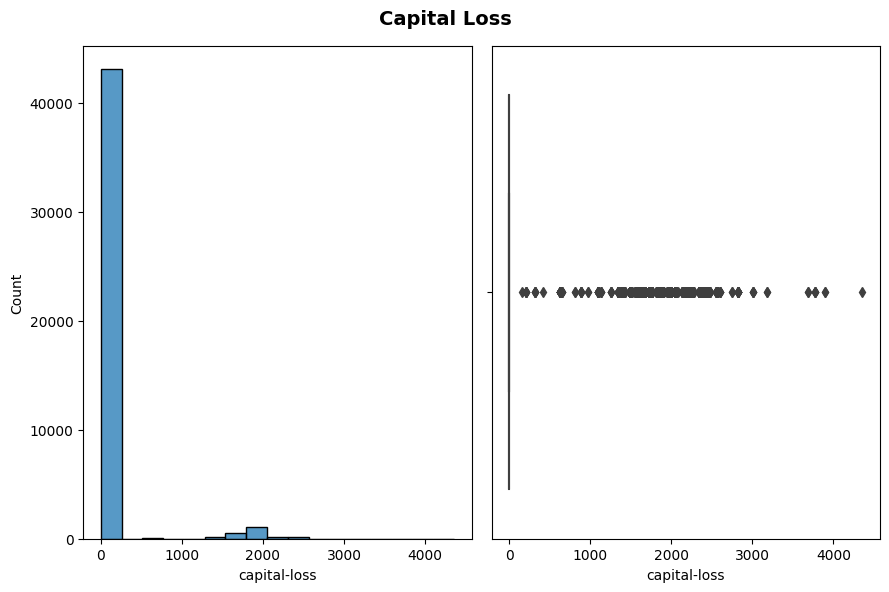

In [59]:
# histogram and boxplot for 'capital-loss'
# figure for two plots 
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))
# histogram
sns.histplot(data = df, x = 'capital-loss', ax = axes[0])
# boxplot
sns.boxplot(data = df, x = 'capital-loss', ax = axes[1])
# figure title
fig.suptitle('Capital Loss', fontsize = 14, fontweight = 'bold', y = .98)
# figure fit
fig.tight_layout();

- Outliers here appear to be capital losses of 3500+

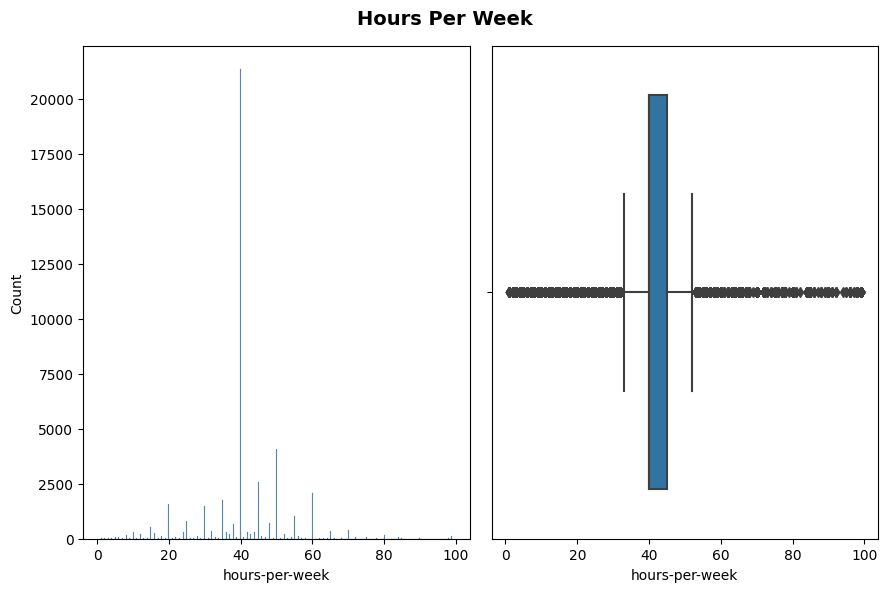

In [65]:
# histogram and boxplot for 'hours-per-week'
# figure for two plots 
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))
# histogram
sns.histplot(data = df, x = 'hours-per-week', ax = axes[0])
# boxplot
sns.boxplot(data = df, x = 'hours-per-week', ax = axes[1])
# figure title
fig.suptitle('Hours Per Week', fontsize = 14, fontweight = 'bold', y = .98)
# figure fit
fig.tight_layout();